# Homework 1

**Philip Carey, PSTAT 197A**

**DUE Monday, OCT 11th by 11:59PM**

The homework in this course is distributed and submitted as iPython notebooks. 

In an iPython notebook, chunks of codes or texts are executed in individual cells. Texts are written in Markdown cell, as you can see in the homework instructions below. Codes are written in code cells. Cells are run one at a time. You can change the cell type by navigating to Cell -> Cell Type.

There are spaces for you to enter your answers to the questions, either in code or text. Feel free to add more cells if you need (likely).

In many parts, some Scikit-learn functions and classes have already been imported to give you leads on what you may need to use. You still need to refer to the Scikit-learn documentation to learn how the classes and methods work. You are free to use other Python data science libraries (NumPy, Pandas, SciPy, Matplotlib/Seaborn, statsmodel, etc). If you are not sure if a library is accepted, please ask.

You are expected to turn in a **pdf version** of this notebook with all your **codes, results, and figures** to **GradeScope**. Make sure the figures and results are visible as you want them to appear in the pdf before turning it in. Please do not modify the instructions as doing so will limit our ability to follow and grade your answers.

## Problem 1

In this problem, you will practice training and evaluating a machine learning model on a simple dataset with Scikit-Learn. We will use the Decision Tree algorithm to demonstrate a typical training process.

Simply put, the idea of training a predictive model is that, given the available data, we want the model to learn the relationship between some underlying patterns within the data and the expected outputs. We hope that after the learning process, the model will be able to reliably predict the outputs of future unseen data.

How do we estimate our model's performance on future unseen data even though we do not have access to such data at the moment? If we can safely assume that the future data follows the same distribution as our training data, we can simulate the future scenario by splitting our available data into a training set and a testing set. We train our model on the training set and evaluate it on the testing set, which serves as a proxy for future data because our model never sees the examples from the testing set during training.

If we assume the future data follows the same distribution as our current data, why bother splitting? We can just use the model's training performance as the estimate for future performance. This is actually not true. After all, the current data and the future data are just 2 samples of a distribution so there are still differences and variations between them. You may have a "lucky" training set that leads to high training performance. Worse, your machine learning model may have memorized the specific details of the current dataset instead of figuring out the general patterns. In that case, we say the model has overfitted the training data. Overfitted model performs poorly on unseen data that it has not "memorized" yet. 

a) Load the data from '**bean.csv**', which is a dataset for predicting bean shapes. There are 13611 learning examples, 17 features, and 4 classes. The first row contains the names of the columns and the last column contains the labels. Store the data and the labels in variables ***X*** and ***y***, respectively.

In [1]:
import pandas as pd
import numpy as np

bean = pd.read_csv('bean.csv')  # don't need full pathname since same folder as this file
bean = bean.to_numpy()
X = bean[:,0:16]
y = bean[:,16]

Split the data into a training set and a testing set. Use 80% of the data for training and the remaining 20% for testing.

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123, shuffle = True)

Initiate a Decision Tree model from Scikit-Learn. Fit the model on the training set. Print the training performance.

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Fit model on training set
tree = DecisionTreeClassifier(random_state=123)
fit = tree.fit(X_train, y_train)
predictions = tree.predict(X_train)
currAccuracy = accuracy_score(y_train,predictions)
print(currAccuracy)

1.0


Evaluate the model on the testing set. Print the testing performance. Is the testing performance the same as the training performance?

In [4]:
# Fit model on test set
predictions = tree.predict(X_test)
currAccuracy = accuracy_score(y_test,predictions)
print(currAccuracy)

0.9048843187660668


Now that have a routine for evaluating our model, is it enough to conclude about our model performance? To be more specific, assume that we have a training set **A** and a testing set **B**. If we train **Decision Tree** model and a **Support Vector Machine** model on **A** and evaluate them on **B**, can we say **Support Vector Machine** is better or worse than **Decision Tree** based on their training performances on **A** or testing performances on **B**? The answer is no because **A** and **B** are just one scenario. We may just have a scenario that is more favorable for **Support Vector Machine** than for **Decision Tree**. To reliably conclude whether a machine learning algorithm is better than another for a specific problem, we need to collect results from multiple scenarios and compare the average performance. Since we only have limited data available to us, we need to use **multi-fold cross-validation** to create multiple **train-validation** scenarios (**Notice**: we use the term **train-validation** instead of **train-test** in **cross-validation** for a reason we will mention in **Problem 3** where we touched model tuning).

In **multi-fold cross-validation**, the dataset is splitted into multiple folds of equal size. Each iteration, we pick a fold to be a **validation set** and let the combination of the remaining folds be the **training set**. For example, in **5-fold cross-validation**, we can create **5** different **train-validation** scenarios. Note that for each scenario, you have to reinitiate your model and start training from scratch.  

b) Split the dataset into **5 folds** and store them (for example, a list of lists). Remember to shuffle the data before splitting so that each fold has a reasonable number of examples from different classes. You must do the splitting without any libraries. 

In [5]:
# Randomize indices to create shuffled data folds
import random

random.seed(123)
indices = range(13611)
arr = np.array(indices)

random.shuffle(arr)

# Indices by fold, splits based on number of entries
i1 = arr[:2722]
i2 = arr[2722:5444]
i3 = arr[5444:8166]
i4 = arr[8166:10888]
i5 = arr[10888:]

index_list = [i1, i2, i3, i4, i5]

For each **train-validation** scenario, initiate a new **Decision Tree** model, train it on the **training set** and evaluate it on the **validation set**. Record the training performances and testing performances of all scenarios.

In [6]:
trainPerfs = []
testPerfs = []

for i in range(len(index_list)):
    # Find the training index
    exclude = [i]
    train_index = [index_list[z] for z in range(len(index_list)) if not z in exclude]
    train_index = np.concatenate(train_index)
    test_index = index_list[i]
    
    # Split into training and validation sets
    training = bean[train_index]
    validate = bean[test_index]
    
    X_train = training[:, 0:16]
    y_train = training[:, 16]
    X_test = validate[:, 0:16]
    y_test = validate[:, 16]
    
    # Create a single decision tree
    tree = DecisionTreeClassifier(random_state=123)
    # Train the model
    fit = tree.fit(X_train, y_train)
    # Test the model
    trainPreds = tree.predict(X_train)
    testPreds = tree.predict(X_test)
    # Evaluate the accuracies
    trainAcc = accuracy_score(y_train, trainPreds)
    testAcc = accuracy_score(y_test, testPreds)
    
    # Store the performances
    trainPerfs.append(trainAcc)
    testPerfs.append(testAcc)

c) On a same figure, plot the **training performances** and validation performances from different scenarios. Specifically, the x-axis shows the scenarios and the y-axis shows the performance. There should be a line for training performances and a line for validation performance.

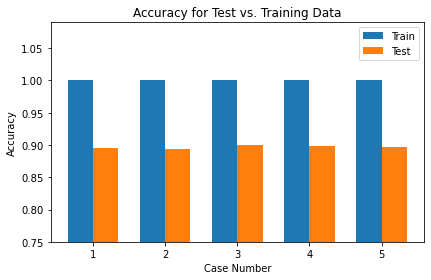

In [7]:
import matplotlib.pyplot as plt

labels = ['1', '2', '3', '4', '5']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, trainPerfs, width, label='Train')
rects2 = ax.bar(x + width/2, testPerfs, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Case Number')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy for Test vs. Training Data')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.ylim(ymin = 0.75, ymax = 1.09)
plt.show()

How do the performances differ across different train-validation splits? How are the validation performances compared to the training performances in general? What may be the reason?

_Blank cell to indicate space between question and answer._

__Solution__: The training performances all seem to be perfectly fitting the data, which indicates that we've been given a very simple dataset or the model is always overfitting. On the other hand, our validation performances usually hover around the 0.9 mark. It would make sense that the validation performances are consistently lower since the model is being fit against data that it has never seen before, whereas the training data is what was used to create the model in the first place.

## Problem 2

**Cross-validation** is useful for comparing different algorithms. In a similar way, **cross-validation** can also be used to tune your learning model. If you take a look at the **Scikit-Learn** documentation of **Decision Tree**, you can see there are many parameters that we can specify when initiating a model. These are called **hyper-parameters** because they are not learned by the model but control how the model learns. You can think of the model as a learning machine and the **hyper-parameters** as knobs to configure the machine. Depending on how you choose the values of these **hyper-parameters**, the resulting model may have varying performances. We can use **cross-validation** to compared between different models of the same learning algorithm but with different **hyper-parameter settings**. 

Which values should we specify for the **hyper-parameters** of our learning algorithm? That depends on the task. As data scientists, we need to understand the mearning of each **hyper-parameter** and the effect it may have on the learning process. For this problem, you are free to consult any learning resource but you need to answer in your own words.

a) Explain the meanings and effects of the following hyper-parameters of **Decision Tree**. The effects mean what happen when you varies the value of a hyper-parameter:


*   Maximum depth
*   Split criterion



__Maximum depth__: When we specify the maximum depth of a decision tree, we are telling this hyperparameter to control how long the length from the root node to a leaf is allowed to be. If we specify the max depth to be a larger number, then our model can capture more complexity as it allows for more specific classifications.

__Split criterion__: When we split in a decision tree, we divide a node into multiple sub-nodes. From sklearn's documentation of decision trees, the criterion measures the "quality" of the split, and will measure how pure a node is when split. This effects the way the tree splits its nodes in its method of computation. For example, the entropy method may give us more pure nodes in general than the Gini method, but it is much more computationally intensive and so it is a tradeoff that we must consider.

b) Explain the meanings and effects of the following hyper-parameters of **Random Forest**. The effects mean what happen when you varies the value of a hyper-parameter:


*   Number of base learners/ estimators
*   Maximum number of test features



__Number of base learners__: The number of base estimators specifies how many trees will be used to fit the sub-samples of the dataset. The number of estimators should be decided based on both the number of observations and the number of features in the dataset. For example, if there are many observations and we only use a small number of estimator trees, then it's possible that some observations are left out of our prediction. In short, how many estimators we have can increase the predictive power if chosen wisely.

__Max number of test features__: The max number of features is a ceiling value to decide how many features to consider when looking for the best split. The more features we allow the model to consider at each split, the more complex our model can be, but this comes at the cost of high computational intensity. The default value is typically sqrt(p).

## Problem 3

In this problem, we will implement hyper-parameter tuning for both Decision Tree and Random Forest. 

Remember we distinguished between **test** and **validation** in Problem 1? Here is the reason. Typically, while tuning the hyperparameters, the model is not allowed to see the testing set. If we use the performance of the model on the testing set to guide the hyper-parameter tuning, our model's configuration will be biased towards the examples in the testing set. As a result, our model's testing performance is no longer a proxy for its performance on future unseen data. As a rule of thumb, no test data is allowed during training and tuning a machine learning model.

To guide our model through hyper-parameter tuning, we need to further reserve a portion of our data as the **validation set**. In total, we split our data into 3 sets: a **training set**, a **validation set**, and a **test set**. Our model will be trained on the **training set** and evaluated on the **validation set**. Based on the model's **validation performance**, we make changes to the values of its **hyper-parameters**, a.k.a **tuning**, and repeat the train-validation process. Once we are happy with the hyper-parameters of our model, we can now test it on the testing set and use the result as a proxy for future performances.

We can do even better. Instead of only one train-validation scenario, we can create multiple train-validation scenarios via **cross-validation**. The **average performance** of the model on the scenarios is used to guide the tuning process.

<br>
<center>
<img src='https://scikit-learn.org/stable/_images/grid_search_cross_validation.png' width=600 height=400>
</center>
<br>


**Hyper-parameter tuning** consists of cross-validation nested within an outer loop that iterates through a list of hyper-parameter combinations. For example, if each hyper-parameter set consists of 2 hyper-parameters **Maximum depth** and **Split criterion**. If we want to check **Maximum depths** in [1,2,3,4,5] and **Split criteria** in ["gini","entropy"] then there are **2 x 5 = 10 hyper-parameter combinations**. For each combination, we initiate a model with the corresponding hyper-parameters and record the cross-validation average performance.


First, let's again import our data from '**bean.csv**. Split the data into a **training set** (80%) and a **testing set** (20%). We will do **hyper-parameter tuning** via **cross-validation** on the training set.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123, shuffle = True)

a) Let us try a simple tuning for the hyper-parameter **Maximum depth** of **Decision Tree**. The values of the depth are in [2,3,5,8,15]. For the cross-validation step, you can use the **cross_validate** function from **Scikit-Learn**. Record the average training performance and testing performance for each value of depth.

In [9]:
from sklearn.model_selection import cross_validate
import statistics as stats
valPerf = []
trainPerf =[]
max_depths = [2,3,5,8,15]

for depth in max_depths:
    # Create tree and cross validate
    tree = DecisionTreeClassifier(random_state=123, max_depth = depth)
    kfold = cross_validate(tree, X_train, y_train, cv = 5, return_train_score = True)
    
    # Average performances and add to list
    val_performances = list(kfold.values())[2]
    train_performances = list(kfold.values())[3]
    valPerf.append(stats.mean(val_performances))
    trainPerf.append(stats.mean(train_performances))


Plot the **training performances** and **testing performances** versus the **maximum depths**. What are the general trends. What may be the reason?

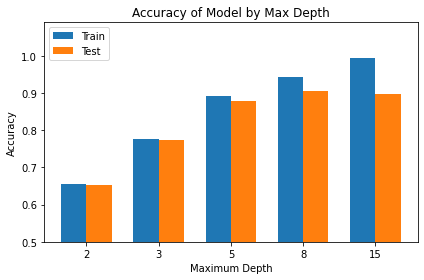

In [10]:
import matplotlib.pyplot as plt

labels = ['2', '3', '5', '8', '15']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, trainPerf, width, label='Train')
rects2 = ax.bar(x + width/2, valPerf, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Maximum Depth')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Model by Max Depth')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.ylim(ymin = 0.5, ymax = 1.09)
plt.show()

__Solution__: We see that with too small of a maximum depth, the model is not very effective in classifying the beans. As we increase the max depth, both the accuacy of the training and validation sets increases. However, while at max depth 15 the training accuracy increases, the testing accuracy is worse than when the max depth was 8. This could be a sign of overfitting, and now we have the knowledge that the max depth should be less than 15.

Finally, test the best model on the testing set and print out the performance. How is the testing performance compared to the cross-validation performance?

In [11]:
# Fit model on test set
tree = DecisionTreeClassifier(random_state = 123, max_depth = 8)
fit = tree.fit(X_train, y_train)
predictions = tree.predict(X_test)
currAccuracy = accuracy_score(y_test,predictions)
print([valPerf[3], currAccuracy])

[0.9053081025311367, 0.9114946749908189]


__Solution__: When fitting the model to our test set, we actually outperformed our accuracy from the validation set, and the accuracy was about 91.1%.

b) Do the same tuning for the hyper-parameter **Number of base learners** of **Random Forest**. The values are in [5,10,15,20,25,30,35,40,45,50]. Record the average training performance and testing performance for each value.

In [12]:
from sklearn.ensemble import RandomForestClassifier
base_learners = [5,10,15,20,25,30,35,40,45,50]
forestVal = []
forestTrain = []

for numLearn in base_learners:
    # Create forest and cross validate
    forest = RandomForestClassifier(random_state = 123, n_estimators = numLearn)
    kfold = cross_validate(forest, X_train, y_train, cv = 5, return_train_score = True)
    
    # Average performances and add to list
    val_performances = list(kfold.values())[2]
    train_performances = list(kfold.values())[3]
    forestVal.append(stats.mean(val_performances))
    forestTrain.append(stats.mean(train_performances))


Plot the **training performances** and **testing performances** versus the **number of base learners**. What are the general trends. What may be the reason?

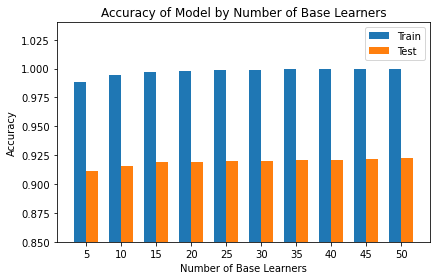

In [13]:
import matplotlib.pyplot as plt

labels = ['5', '10', '15', '20', '25', '30', '35', '40', '45', '50']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, forestTrain, width, label='Train')
rects2 = ax.bar(x + width/2, forestVal, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Number of Base Learners')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Model by Number of Base Learners')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.ylim(ymin = 0.85, ymax = 1.04)
plt.show()

__Solution__: The trend for both the training and testing data is that the number of base learners always increased the accuraacy of the model on our scale. The training accuracy should always increase with number of base learners, but the fact that the validation accuracies never stopped increasing indicates the maybe the optimal number of base learners has not yet been reached.

Finally, test the best model on the testing set and print out the performance. How is the testing performance compared to the cross-validation performance?

In [14]:
# Fit model on test set
forest = RandomForestClassifier(random_state = 123, n_estimators = 50)
fit = forest.fit(X_train, y_train)
predictions = forest.predict(X_test)
currAccuracy = accuracy_score(y_test, predictions)
print([forestVal[9], currAccuracy])

[0.922759435504247, 0.9232464193903782]


__Solution__: Again, our model performed just slightly better on the test set than it did on the validation set, with an accuracy of aobut 92.32%

## Problem 4

**This is an open-ended problem**

We are going to train a binary classifier for a set of red points and another binary classifier for a set of blue points. 

You are given a red dataset in '**R.csv**' and a blue dataset in '**B.csv**'.

a) Load the datasets. All datasets are 2-D with the last column containing the labels. 

In [15]:
B = pd.read_csv('B.csv')  # 'Blue' dataset
B = B.to_numpy()
R = pd.read_csv('R.csv')  # 'Red' dataset
R = R.to_numpy()

In [16]:
# Red data
Xr = R[:, :2]
yr = R[:, 2]

# Blue data
Xb = B[:, :2]
yb = B[:, 2]

In [17]:
# Red split
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size = 0.2, 
                                                        random_state = 123, shuffle = True)

# Blue split
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size = 0.2, 
                                                        random_state = 123, shuffle = True)

b) Train 2 classifiers, one for the red dataset and the other for the blue dataset. You are free to choose the learning algorithm from Scikit-Learn. 

In [18]:
# Make a classifier for red data
estimators = np.arange(4, 20, 2)
redTestMeans = []

for est in estimators:
    forestRed= RandomForestClassifier(random_state=123, n_estimators = est)
    kfold = cross_validate(forestRed, Xr_train, yr_train, cv = 5, return_train_score = True)
    redTest = list(kfold.values())[2]
    redTrain = list(kfold.values())[3]
    redTestMeans.append(stats.mean(redTest))
    
print("Values:", redTestMeans) # Choose 16 estimators

Values: [0.8126153846153846, 0.7895384615384615, 0.788923076923077, 0.8283076923076923, 0.8283076923076923, 0.836, 0.852, 0.844]


In [19]:
# Make a classifier for blue data
estimators = np.arange(4, 20, 2)
blueTestMeans = []

for est in estimators:
    forestBlue = RandomForestClassifier(random_state=123, n_estimators = est)
    kfold = cross_validate(forestBlue, Xb_train, yb_train, cv = 5, return_train_score = True)
    blueTest = list(kfold.values())[2]
    blueTrain = list(kfold.values())[3]
    blueTestMeans.append(stats.mean(blueTest))

print("Values:", blueTestMeans)  # Choose 8 estimators

Values: [0.8738461538461538, 0.8738461538461538, 0.8818461538461538, 0.8818461538461538, 0.8818461538461538, 0.8815384615384615, 0.8738461538461538, 0.8738461538461538]


In [20]:
# Fit for red data
forestRed = RandomForestClassifier(random_state = 123, n_estimators = 16)
fitRed = forestRed.fit(Xr_train, yr_train)

# Fit for blue data
forestBlue = RandomForestClassifier(random_state = 123, n_estimators = 8)
fitBlue = forestBlue.fit(Xb_train, yb_train)

In [21]:
# From linked blog post
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib
import pandas as pd

In [22]:
# Helper function to plot a decision boundary.
def plot_decision_boundary_red(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = Xr_train[:, 0].min() - .5, Xr_train[:, 0].max() + .5
    y_min, y_max = Xr_train[:, 1].min() - .5, Xr_train[:, 1].max() + .5
    h = 0.01
    
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(Xr_train[:, 0], Xr_train[:, 1], c=yr_train, cmap=plt.cm.Spectral)

Text(0.5, 1.0, 'Random Forest Classifier for Red')

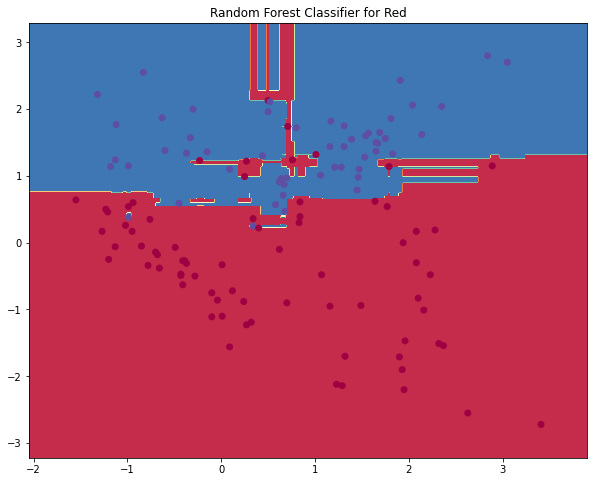

In [23]:
# Display plots inline and change default figure size
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

plot_decision_boundary_red(lambda x: fitRed.predict(x))
plt.title("Random Forest Classifier for Red")

In [24]:
# Helper function to plot a decision boundary.
def plot_decision_boundary_blue(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = Xb_train[:, 0].min() - .5, Xb_train[:, 0].max() + .5
    y_min, y_max = Xb_train[:, 1].min() - .5, Xb_train[:, 1].max() + .5
    h = 0.01
    
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(Xb_train[:, 0], Xb_train[:, 1], c=yb_train, cmap=plt.cm.Spectral)

Text(0.5, 1.0, 'Random Forest Classifier for Blue')

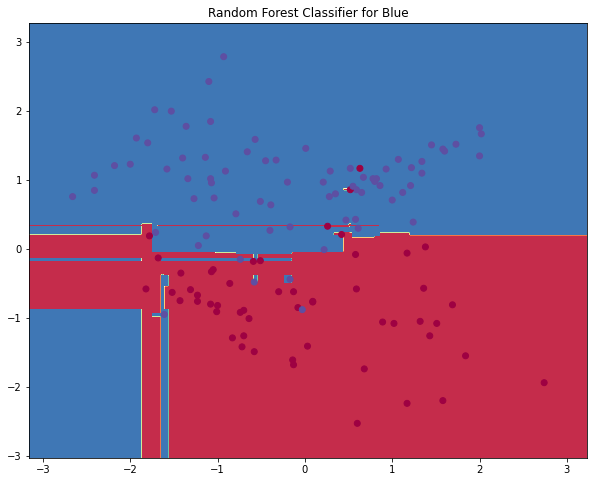

In [25]:
# Display plots inline and change default figure size
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

plot_decision_boundary_blue(lambda x: fitBlue.predict(x))
plt.title("Random Forest Classifier for Blue")

What are the **decision boundaries** of the classifiers? Are they the same? What does it tell you about the difference between the **R** population and the **B** population. The **decision boundary** is the values that separate the positive instances from the negative instances. For example, if a classifier decides that all instances with feature value > 5 are positive and all instances with feature value < 5 are negative, then 5 is the decision boundary of that classifier. You can answer by showing/contrasting the decision boundaries on a figure/figures.

__Solution__: For the red population, the random forest classifier shows us that red points are typically below a y-value of 0.8 for any x-value, and there are just a few outliers that are misclassified. For the blue population, it showed us that blue points were typically above a y-value of about 0.2, again showing us just a few misclassified points below that threshold. The decision boundaries are not exactly the same. We can tell for the most part that values above y=0.8 are usually blue and values below y=0.2 are usually red, but the classifiers have made it difficult to distinguish for all values in between y=0.2 and 0.8 when looking at the two populations. So from this, we can deduce they have similar characteristics on the extremes, but certain attributes will make them difficult to separate.

c) Now, imagine that we combine the **R** population and the **B** population into one single population. Given the classifiers that we trained from the previous part, how should the joint classifier be chosen so that it is fair to both groups? How would you express the fairness constraint explicitly? (**Note**: Don't worry about right or wrong here)

As a motivation, consider a real example in which you work for a financial company that accepts loan application. You have data of people from two different areas of your city, each with a different social-economic situation. Normally, our company has internal processes to deal with people from either areas (2 classifiers where positive means granting loan and negative means no loan). However, due to COVID-19, we are not in a good financial state right now so we can only grant loans to a limited number of people from either areas. If we only care about profit, we will just give loans to those in the better area, but is it socially fair to those from the other area? How should we adjust/combine our internal processes (the classifiers) to process the applications in a fair way.

__Solution__: In this example, we have two populations to pick from, and we might assume one is socio-economically more challenged than the other. As I talked about in my results, I think it's fair to say that anybody who was either above or below a certain y-value (y>0.8, y<0.2) should be classified in a certain way. As for those in the middle, perhaps we could go into more depth and create a separate, additional classifier that considers different attributes as the ones we used for the original classifier. This would automatically accept anyone in high financial standing and reject anyone who simply isn't financially reliable enough, while still giving a fair chance to those who lie on the cusp of being in either boundary. 

To test this theory, we can combine our Red and Blue populations and train on model on this data to see what would happen.

In [26]:
BlueRed = np.append(B,R,axis=0)

In [27]:
X = BlueRed[:, :2]
y = BlueRed[:, 2]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123, shuffle = True)

In [29]:
# Make a classifier for all data
estimators = np.arange(4, 20, 2)
testMeans = []

for est in estimators:
    forest = RandomForestClassifier(random_state=123, n_estimators = est)
    kfold = cross_validate(forest, X_train, y_train, cv = 5, return_train_score = True)
    test = list(kfold.values())[2]
    train = list(kfold.values())[3]
    testMeans.append(stats.mean(test))
    
print("Values:", testMeans) # Choose 12 estimators

Values: [0.8072156862745098, 0.8030588235294117, 0.8031372549019608, 0.8149019607843138, 0.8306666666666667, 0.8227450980392157, 0.8266666666666667, 0.8266666666666667]


In [30]:
# Fit for red data
forest = RandomForestClassifier(random_state = 123, n_estimators = 12)
fit = forest.fit(X_train, y_train)

In [31]:
# Helper function to plot a decision boundary.
def plot_decision_boundary_all(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
    y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
    h = 0.01
    
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral)

Text(0.5, 1.0, 'Random Forest Classifier for All')

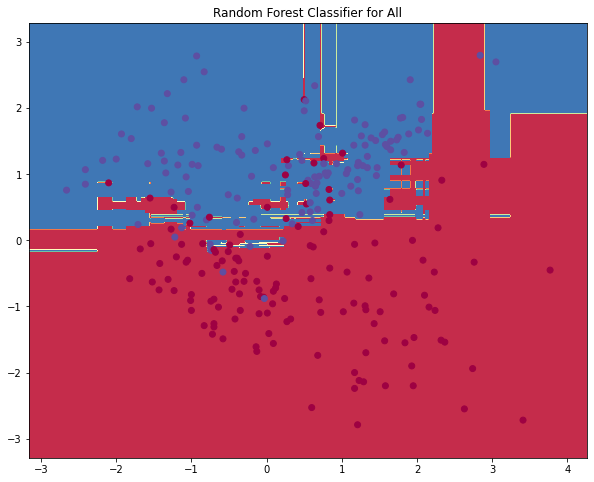

In [32]:
# Display plots inline and change default figure size
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

plot_decision_boundary_all(lambda x: fit.predict(x))
plt.title("Random Forest Classifier for All")

In [33]:
# Helper function to plot a decision boundary.
def plot_decision_boundary_all_vs_blue(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
    y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
    h = 0.01
    
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(Xb_train[:, 0], Xb_train[:, 1], c=yb_train, cmap=plt.cm.Spectral)

Text(0.5, 1.0, 'Random Forest Classifier for All vs. Blue Data')

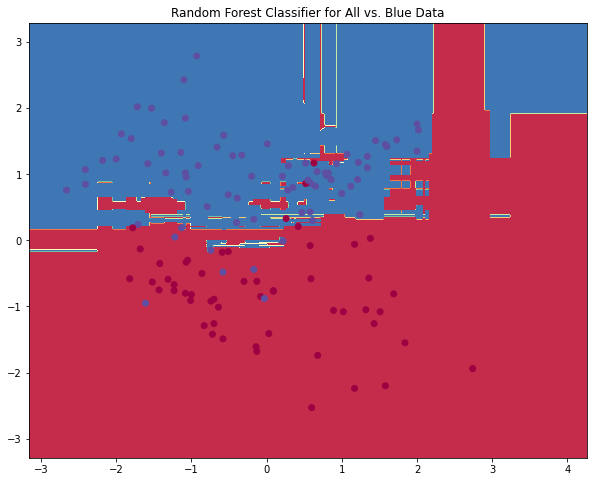

In [34]:
# Display plots inline and change default figure size
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

plot_decision_boundary_all_vs_blue(lambda x: fit.predict(x))
plt.title("Random Forest Classifier for All vs. Blue Data")

In [35]:
# Helper function to plot a decision boundary.
def plot_decision_boundary_all_vs_red(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
    y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
    h = 0.01
    
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(Xr_train[:, 0], Xr_train[:, 1], c=yr_train, cmap=plt.cm.Spectral)

Text(0.5, 1.0, 'Random Forest Classifier for All vs. Red Data')

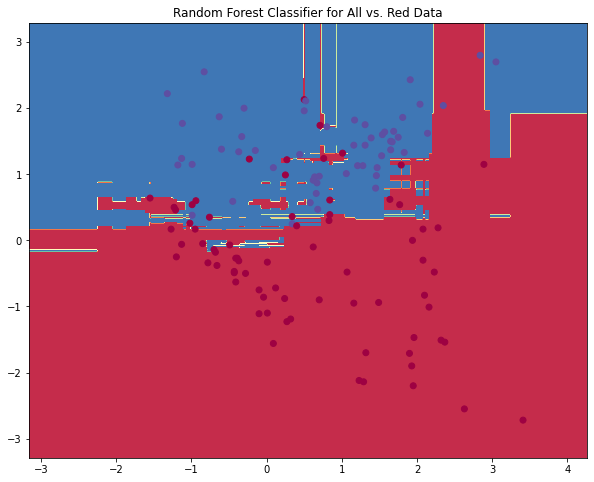

In [36]:
# Display plots inline and change default figure size
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

plot_decision_boundary_all_vs_red(lambda x: fit.predict(x))
plt.title("Random Forest Classifier for All vs. Red Data")

Now that we have made a visualization of the new classification model against the whole population, the blue population, and the red population, we can see the disparities between models. We'll notice that the classifier beneficial towards those in the red population as it tends to classify them correctly more often than not, but the blue classifier tends to have quite a few more outliers. This shows a difficulty in choosing a joint model based on just concatenating the two poulations, and we need to consider other factors like weighting the two models differently or perhaps creating another joint classifier for a certain percent of the population like I mentioned in the beginning of this problem.